In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2609,2610,15755242,Rowe,682,France,Female,46,2,0.00,1,1,1,114442.66,0
1428,1429,15794560,Maclean,550,France,Male,57,5,0.00,1,1,1,133501.94,0
7044,7045,15738487,Leworthy,678,France,Male,26,3,0.00,2,1,0,4989.33,0
1353,1354,15623644,Frolov,626,Spain,Male,29,7,0.00,2,1,0,49361.84,0
7240,7241,15591552,Okonkwo,600,France,Female,32,7,98877.95,1,1,0,132973.21,0


Bank Churn Data Model - Classification :
The dataset consists of a randomly sampled population of a banking customers detailing demographics (independent variables) and whether a customer left (or stayed) the bank (dependent variable). 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)#deleted unwanted columns

In [6]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
sorted(dataset.Geography.unique())

['France', 'Germany', 'Spain']

# converting categorical data into numerical

In [8]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Categorical boolean mask
categorical_feature_mask = dataset.dtypes=='object'
#filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

In [9]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
dataset[categorical_cols].sample(5)

,Geography,Gender
7649,0,0
7387,0,1
6320,2,1
9726,2,1
7473,2,1


In [10]:
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
#categorical_features = boolean mask for categorical columns
#sparse = False output an array not sparse matrix

In [11]:
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(dataset) # It returns an numpy array
dataset.sample(5)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2109,596,2,1,41,5,0.00,2,0,1,141053.85,0
8780,820,1,1,39,9,111336.89,1,1,0,16770.31,1
5378,606,1,1,27,2,130274.26,2,1,0,147533.09,0
4026,762,1,1,56,10,100260.88,3,1,1,77142.42,1
4670,637,1,1,41,2,138014.40,2,1,0,140298.24,0


In [12]:
dataset.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


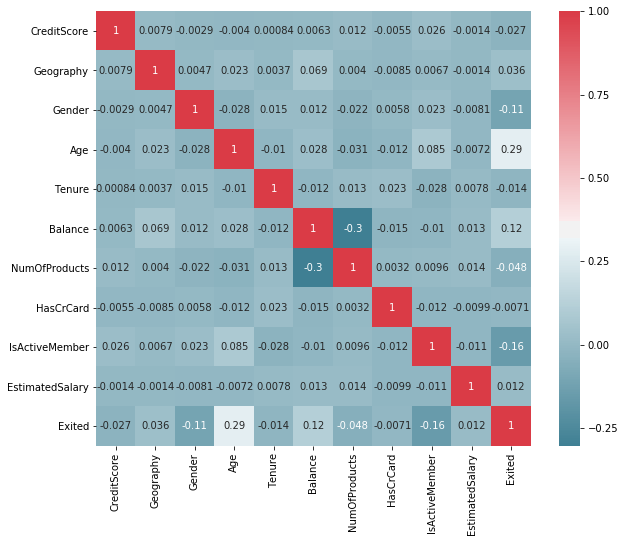

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,
            square=True, ax=ax)

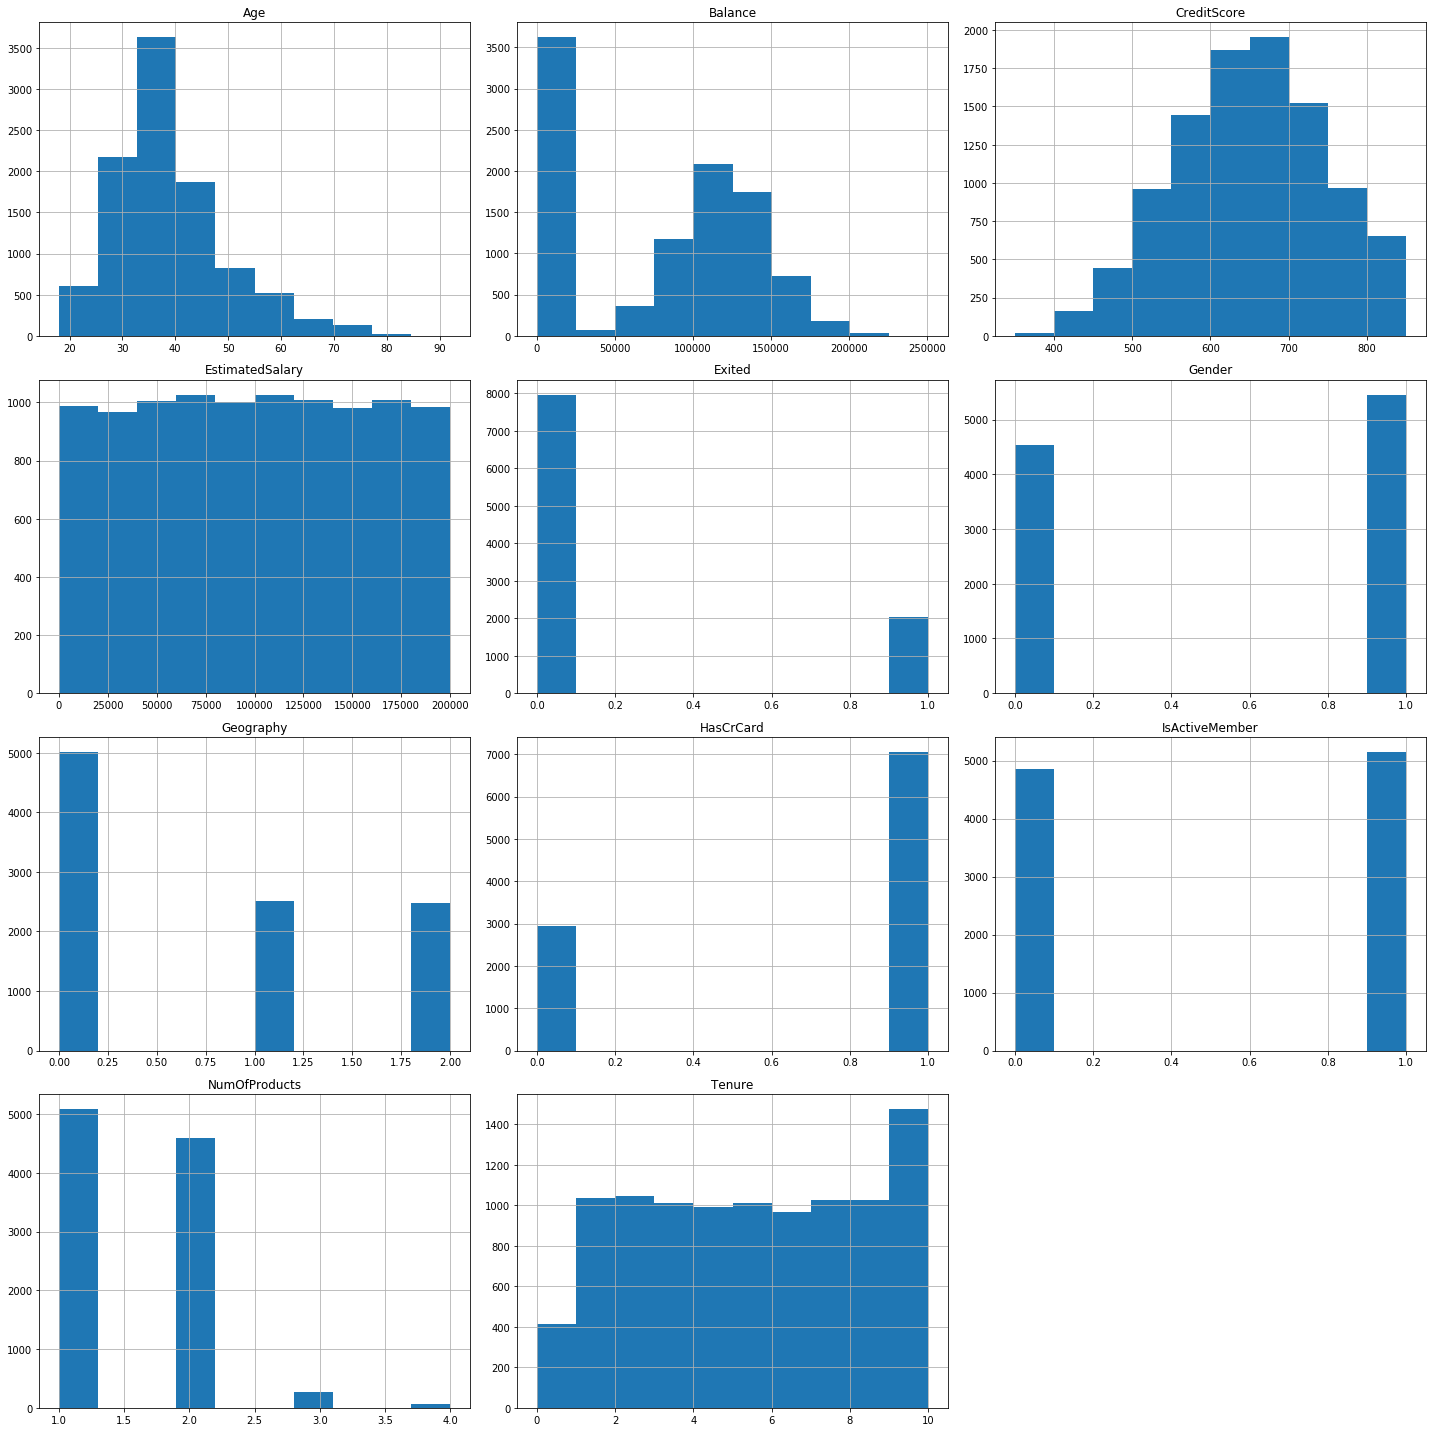

In [14]:
dataset.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

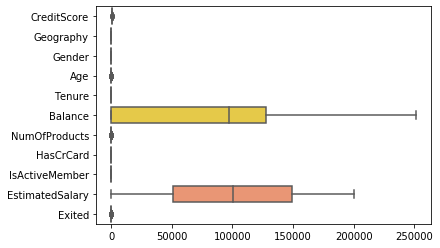

In [15]:
#checking outliers
sns.boxplot(data=dataset, orient="h", palette="Set2")

In [16]:
# seperating target variable
X=dataset.iloc[:,:9].values
y=dataset['Exited'].values.reshape(-1,1)
print(X.shape),(y.shape)

(10000, 9)


(None, (10000, 1))

In [17]:
# let's split the data into train,test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=5)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

The Shape of X_TRAIN is (7000, 9)
The Shape of X_TEST is (3000, 9)
The Shape of Y_TRAIN is (7000, 1)
The Shape of Y_TEST is (3000, 1)


# Basic Logistic classifier

In [18]:
# finding 'y', coefficient and intercepts in logit
import statsmodels.api as sm
logit=sm.Logit(y_train, X_train)

In [19]:
# getting probability of 'y'
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.447288
         Iterations 6


In [20]:
# summary of losgistic regreesion model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Dec 2019   Pseudo R-squ.:                  0.1199
Time:                        22:09:40   Log-Likelihood:                -3131.0
converged:                       True   LL-Null:                       -3557.6
Covariance Type:            nonrobust   LLR p-value:                7.381e-179
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0035      0.000    -16.072      0.000      -0.004      -0.003
x2             0.0688      0.039      1.781      0.075      -0.007       0.145
x3            -0.6499      0.063    -10.324      0.000      -0.773      -0.527
x4             0.0579      0.003     21.045      0.000       0.053       0.063
x5            -0.0466      0.011     -4.321      0.000      -0.068      -0.025
x6          3.055e-06   5.24e-07      5.831      0.000    2.03e-06    4.08e-06
x7            -0.3630      0.054     -6.780      0.000      -0.468      -0.258
x8            -0.1629      0.067     -2.432      0.015      -0.294      -0.032
x9            -1.1118      0.067    -16.568      0.000      -1.243      -0.980
==============================================================================
"""

In [21]:
y_pred=result.predict(X_test)

In [22]:
# confusion matrix
result.pred_table()

array([[5402.,  158.],
       [1181.,  259.]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score([1 if p >0.5 else 0 for p in y_pred], y_test)

0.8126666666666666

# Machine Learning algorithm building

In [24]:
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

pred = logit_model.predict_proba(X_train)
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(X_test)
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.6676485061950439
Logit test roc-auc: 0.6818940032385536


# Random Forest

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.999363384292566
RF test roc-auc: 0.8052950283390876


# AdaBoost

In [27]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

pred = ada_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.8633061675659472
Adaboost test roc-auc: 0.8375955237416101


# XGBoost

In [28]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.8861781824540367
xgb test roc-auc: 0.8587977339882935


# Select threshold for maximum accuracy


In [29]:
pred_ls = []
for model in [xgb_model, rf_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.842281876855494


In [30]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
thresholds

array([1.83068084, 0.83068084, 0.74491872, 0.74463187, 0.70571778,
       0.70571673, 0.69230367, 0.69136979, 0.68033613, 0.67889849,
       0.67872875, 0.67746704, 0.66161874, 0.66121286, 0.66044834,
       0.65932066, 0.64066971, 0.63944826, 0.63936284, 0.63891807,
       0.63825511, 0.63785583, 0.63540977, 0.63458262, 0.62838075,
       0.62790105, 0.62759147, 0.62643587, 0.62444781, 0.62408478,
       0.62321709, 0.62191565, 0.62146515, 0.62058936, 0.61943952,
       0.61901363, 0.61613755, 0.61544171, 0.60755896, 0.60737388,
       0.6046704 , 0.60384244, 0.60308072, 0.60272   , 0.60259129,
       0.60193497, 0.6019129 , 0.6017117 , 0.59637713, 0.59455187,
       0.59364788, 0.59292299, 0.5927865 , 0.59271275, 0.59125602,
       0.59095922, 0.58879378, 0.58751587, 0.58732069, 0.58154166,
       0.57259865, 0.56987332, 0.56931863, 0.56856121, 0.56742677,
       0.56694681, 0.56370674, 0.56322562, 0.55690424, 0.55613044,
       0.54868524, 0.54850504, 0.54445884, 0.54417202, 0.53871

In [31]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.sample(20)

,thresholds,accuracy
493,0.246001,0.701667
307,0.326425,0.815000
97,0.499818,0.856000
108,0.483688,0.855000
643,0.168576,0.352000
485,0.248121,0.707000
138,0.450861,0.854000
666,0.145426,0.228000
356,0.304841,0.792000
621,0.178187,0.408000


# Balancing the Imbalance dataset with over/up sampling

Left Bank: 7963
Continue Banking: 2037
Proportion: 3.91 : 1


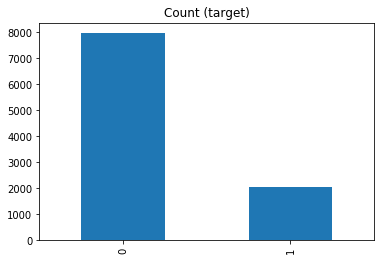

In [32]:
# checking the balance of target variable
target_count = dataset.Exited.value_counts()
print('Left Bank:', target_count[0])
print('Continue Banking:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [33]:
## Get the left Bank and Continue Banking dataset 
Continue_Banking = dataset[dataset['Exited']==1]
Left_Bank = dataset[dataset['Exited']==0]

In [34]:
print(Left_Bank.shape,Continue_Banking.shape)

(7963, 11) (2037, 11)


In [35]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [36]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_new,y_new=smk.fit_sample(X,y)

In [37]:
X_new.shape,y_new.shape

((14318, 9), (14318,))

In [38]:
from collections import Counter
#print('Original dataset shape {}'.format(Counter(y)))
print('Up_sampled dataset shape {}'.format(Counter(y_new)))

Up_sampled dataset shape Counter({1: 7159, 0: 7159})


In [39]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [40]:
ups =  RandomOverSampler(ratio=0.5)

In [41]:
X_train_new, y_train_new = ups.fit_sample(X, y)
X_train_new.shape,y_train_new.shape

((11944, 9), (11944,))

In [42]:
#print('Original dataset shape {}'.format(Counter(y)))
print('up_sampled dataset shape {}'.format(Counter(y_train_new)))

up_sampled dataset shape Counter({0: 7963, 1: 3981})


In [43]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=5)
print('The Shape of X_TRAIN is',X_train_new.shape)
print('The Shape of X_TEST is',X_test_new.shape)
print('The Shape of Y_TRAIN is',y_train_new.shape)
print('The Shape of Y_TEST is',y_test_new.shape)

The Shape of X_TRAIN is (8360, 9)
The Shape of X_TEST is (3584, 9)
The Shape of Y_TRAIN is (8360,)
The Shape of Y_TEST is (3584,)


In [44]:
xgb_model_ups = xgb.XGBClassifier()

eval_set = [(X_test_new, y_test_new)]
xgb_model_ups.fit(X_train_new, y_train_new, eval_metric="auc", eval_set=eval_set, verbose=False)

pred_ups = xgb_model_ups.predict_proba(X_train_new)
print('xgb up sample train data roc-auc: {}'.format(roc_auc_score(y_train_new, pred_ups[:,1])))
pred_ups = xgb_model_ups.predict_proba(X_test_new)
print('xgb up sample test data roc-auc: {}'.format(roc_auc_score(y_test_new, pred_ups[:,1])))

xgb up sample train data roc-auc: 0.8834996914060593
xgb up sample test data roc-auc: 0.8638211424920845
